In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                'key2': ['one', 'two', 'one', 'two', 'one'],
                'data1': np.random.randn(5),
                'data2': np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.060897,-0.022241,a,one
1,-0.695378,0.101628,a,two
2,2.183888,0.044940,b,one
3,-1.021640,2.538400,b,two
4,1.592190,-2.601645,a,one


In [3]:
grouped=df['data1'].groupby(df['key1'])
grouped

In [4]:
grouped.mean()

key1
a    0.278638
b    0.581124
Name: data1, dtype: float64

In [5]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.765646
      two    -0.695378
b     one     2.183888
      two    -1.021640
Name: data1, dtype: float64

In [6]:
means.unstack()

key2,one,two
key1,,
a,0.765646,-0.695378
b,2.183888,-1.021640


In [7]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -0.695378
            2006    2.183888
Ohio        2005   -0.541269
            2006    1.592190
Name: data1, dtype: float64

In [8]:
df.groupby('key1').mean()


,data1,data2
key1,,
a,0.278638,-0.840753
b,0.581124,1.291670


In [9]:
df.groupby(['key1', 'key2']).mean()


data1     data2
key1 key2                    
a    one   0.765646 -1.311943
     two  -0.695378  0.101628
b    one   2.183888  0.044940
     two  -1.021640  2.538400

In [10]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [11]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.060897 -0.022241    a  one
1 -0.695378  0.101628    a  two
4  1.592190 -2.601645    a  one
b
      data1    data2 key1 key2
2  2.183888  0.04494    b  one
3 -1.021640  2.53840    b  two


In [12]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
      data1     data2 key1 key2
0 -0.060897 -0.022241    a  one
4  1.592190 -2.601645    a  one
a two
      data1     data2 key1 key2
1 -0.695378  0.101628    a  two
b one
      data1    data2 key1 key2
2  2.183888  0.04494    b  one
b two
     data1   data2 key1 key2
3 -1.02164  2.5384    b  two


In [13]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,2.183888,0.04494,b,one
3,-1.021640,2.53840,b,two


In [14]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Traivs'])
people.loc[2:3, ['b', 'c']] = np.nan

In [15]:
people

,a,b,c,d,e
Joe,0.104340,0.167350,-1.366457,0.130724,1.579378
Steve,0.192196,-0.829624,-0.168225,-1.320807,1.473255
Wes,0.887591,NaN,NaN,0.091294,0.977425
Jim,-0.312872,0.761569,-0.245653,1.796853,0.414065
Traivs,-0.997723,-0.552505,0.516796,0.047742,-0.167259


In [16]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f': 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-1.235733,1.851068
Steve,-1.489032,0.835827
Wes,0.091294,1.865016
Jim,1.551200,0.862762
Traivs,0.564538,-1.717487


In [17]:
map_series = Series(mapping)
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Traivs,2,3


In [18]:
people.groupby(len).sum()


,a,b,c,d,e
3,0.679059,0.928919,-1.612110,2.018871,2.970868
5,0.192196,-0.829624,-0.168225,-1.320807,1.473255
6,-0.997723,-0.552505,0.516796,0.047742,-0.167259


In [19]:
df

,data1,data2,key1,key2
0,-0.060897,-0.022241,a,one
1,-0.695378,0.101628,a,two
2,2.183888,0.044940,b,one
3,-1.021640,2.538400,b,two
4,1.592190,-2.601645,a,one


In [20]:
grouped = df.groupby('key1')
grouped

In [21]:
grouped['data1'].quantile(0.9)


key1
a    1.261572
b    1.863335
Name: data1, dtype: float64

In [22]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.287567,2.703273
b,3.205528,2.493460


In [23]:
grouped.describe()


data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.278638  1.180976 -0.695378 -0.378138 -0.060897  0.765646   
b      2.0  0.581124  2.266650 -1.021640 -0.220258  0.581124  1.382506   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.592190   3.0 -0.840753  1.526235 -2.601645 -1.311943 -0.022241   
b     2.183888   2.0  1.291670  1.763142  0.044940  0.668305  1.291670   

                          
           75%       max  
key1                      
a     0.039693  0.101628  
b     1.915035  2.538400

In [24]:
tips = pd.read_csv('tips.csv')


In [25]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']


In [26]:
grouped = tips.groupby(['sex', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')


sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [27]:
grouped_pct.agg(['mean','std', peak_to_peak])


mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [28]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])


foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [29]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [30]:
grouped.agg({'tip': 'max', 'size': 'sum'})


size   tip
sex    smoker            
Female No       140   5.2
       Yes       74   6.5
Male   No       263   9.0
       Yes      150  10.0

In [31]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'], 'size': 'sum'})


size   tip_pct                              
               sum       min       max      mean       std
sex    smoker                                             
Female No      140  0.056797  0.252672  0.156921  0.036421
       Yes      74  0.056433  0.416667  0.182150  0.071595
Male   No      263  0.071804  0.291990  0.160669  0.041849
       Yes     150  0.035638  0.710345  0.152771  0.090588

In [32]:
df

,data1,data2,key1,key2
0,-0.060897,-0.022241,a,one
1,-0.695378,0.101628,a,two
2,2.183888,0.044940,b,one
3,-1.021640,2.538400,b,two
4,1.592190,-2.601645,a,one


In [33]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.278638,-0.840753
b,0.581124,1.291670


In [34]:
pd.merge(df, k1_means, left_on='key1', right_index=True)


,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.060897,-0.022241,a,one,0.278638,-0.840753
1,-0.695378,0.101628,a,two,0.278638,-0.840753
4,1.592190,-2.601645,a,one,0.278638,-0.840753
2,2.183888,0.044940,b,one,0.581124,1.291670
3,-1.021640,2.538400,b,two,0.581124,1.291670


In [35]:
people

,a,b,c,d,e
Joe,0.104340,0.167350,-1.366457,0.130724,1.579378
Steve,0.192196,-0.829624,-0.168225,-1.320807,1.473255
Wes,0.887591,NaN,NaN,0.091294,0.977425
Jim,-0.312872,0.761569,-0.245653,1.796853,0.414065
Traivs,-0.997723,-0.552505,0.516796,0.047742,-0.167259


In [36]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.001931,-0.192577,-0.424830,0.089920,0.796514
two,-0.060338,-0.034027,-0.206939,0.238023,0.943660


In [37]:
people.groupby(key).transform(np.mean)


,a,b,c,d,e
Joe,-0.001931,-0.192577,-0.424830,0.089920,0.796514
Steve,-0.060338,-0.034027,-0.206939,0.238023,0.943660
Wes,-0.001931,-0.192577,-0.424830,0.089920,0.796514
Jim,-0.060338,-0.034027,-0.206939,0.238023,0.943660
Traivs,-0.001931,-0.192577,-0.424830,0.089920,0.796514


In [38]:
def demean(arr):
    return arr - arr.mean()

people.groupby(key).transform(demean)

,a,b,c,d,e
Joe,0.106271,0.359927,-0.941626,0.040804,0.782863
Steve,0.252534,-0.795596,0.038714,-1.558830,0.529595
Wes,0.889521,NaN,NaN,0.001374,0.180910
Jim,-0.252534,0.795596,-0.038714,1.558830,-0.529595
Traivs,-0.995792,-0.359927,0.941626,-0.042178,-0.963774


In [39]:
demeaned = people.groupby(key).transform(demean)

In [40]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,-3.700743e-17,0.0,0.000000e+00,2.312965e-18,-1.850372e-16
two,0.000000e+00,0.0,-1.387779e-17,0.000000e+00,0.000000e+00


In [41]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [42]:
tips.groupby('smoker').apply(top)


total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [43]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')


total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [44]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [45]:
result.unstack('smker')


       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [46]:
f = lambda x: x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

In [47]:
tips.groupby('smoker', group_keys=False).apply(top)


,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [48]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [49]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)

In [50]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped=frame.data2.groupby(factor)
grouped

In [51]:
grouped.apply(get_stats)


data1                  
(-3.057, -1.419]  count     88.000000
                  max        2.537088
                  mean      -0.070456
                  min       -2.178499
(-1.419, 0.212]   count    535.000000
                  max        3.827082
                  mean       0.031079
                  min       -2.817888
(0.212, 1.844]    count    348.000000
                  max        2.782042
                  mean      -0.114104
                  min       -3.239712
(1.844, 3.475]    count     29.000000
                  max        1.028959
                  mean      -0.233864
                  min       -2.591952
Name: data2, dtype: float64

In [52]:
grouped.apply(get_stats).unstack()


,count,max,mean,min
data1,,,,
"(-3.057, -1.419]",88.0,2.537088,-0.070456,-2.178499
"(-1.419, 0.212]",535.0,3.827082,0.031079,-2.817888
"(0.212, 1.844]",348.0,2.782042,-0.114104,-3.239712
"(1.844, 3.475]",29.0,1.028959,-0.233864,-2.591952


In [53]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.537088,-0.092563,-2.178499
1,100.0,2.834056,0.080167,-2.817888
2,100.0,2.484182,-0.083032,-2.471951
3,100.0,1.819028,0.053126,-1.750842
4,100.0,2.440130,0.008210,-2.715879
5,100.0,2.648465,0.119332,-2.357298
6,100.0,3.827082,-0.117428,-2.238307
7,100.0,1.884947,-0.011183,-2.638826
8,100.0,2.782042,0.049040,-1.931451


In [54]:
s = Series(np.random.randn(6))
s[::2] = np.nan

In [55]:
s

0         NaN
1   -0.530970
2         NaN
3    0.654694
4         NaN
5   -2.395994
dtype: float64

In [56]:
s.fillna(s.mean())


0   -0.757423
1   -0.530970
2   -0.757423
3    0.654694
4   -0.757423
5   -2.395994
dtype: float64

In [57]:
states = ['Ohio', 'New York', 'Vermont', 'Floria',
          'Oregon', 'Nevada', 'Clifornia', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data

Ohio        -0.277947
New York    -1.400597
Vermont      0.414876
Floria      -0.560896
Oregon      -0.769724
Nevada      -0.562351
Clifornia    0.420304
Idaho       -0.002933
dtype: float64

In [58]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio        -0.277947
New York    -1.400597
Vermont           NaN
Floria      -0.560896
Oregon      -0.769724
Nevada            NaN
Clifornia    0.420304
Idaho             NaN
dtype: float64

In [59]:
data.groupby(group_key).mean()


East   -0.74648
West   -0.17471
dtype: float64

In [60]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio        -0.277947
New York    -1.400597
Vermont     -0.746480
Floria      -0.560896
Oregon      -0.769724
Nevada      -0.174710
Clifornia    0.420304
Idaho       -0.174710
dtype: float64

In [61]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = Series(card_val, index=cards)


In [62]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

8D     8
5S     5
AD     1
2S     2
KD    10
dtype: int64

In [63]:
draw(deck)

10H    10
8D      8
QC     10
5H      5
3S      3
dtype: int64

In [64]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.248892
b   -0.310004
dtype: float64

In [65]:
close_px = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
rets=close_px.pct_change().dropna()


In [66]:
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)

In [67]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [68]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))


2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [77]:
tips.pivot_table(index=['sex', 'smoker'])


size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [81]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker')


size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [82]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker',
                 margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [84]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker',
                 margins=True, aggfunc=len)

size              tip_pct             
smoker          No   Yes    All      No   Yes    All
sex    day                                          
Female Fri     2.0   7.0    9.0     2.0   7.0    9.0
       Sat    13.0  15.0   28.0    13.0  15.0   28.0
       Sun    14.0   4.0   18.0    14.0   4.0   18.0
       Thur   25.0   7.0   32.0    25.0   7.0   32.0
Male   Fri     2.0   8.0   10.0     2.0   8.0   10.0
       Sat    32.0  27.0   59.0    32.0  27.0   59.0
       Sun    43.0  15.0   58.0    43.0  15.0   58.0
       Thur   20.0  10.0   30.0    20.0  10.0   30.0
All          151.0  93.0  244.0   151.0  93.0  244.0

In [86]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'], columns='day',
                 aggfunc=sum, fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

In [89]:
pd.crosstab([tips['time'], tips['day']], tips['smoker'], margins=True)


smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [93]:
fec=pd.read_csv('P00000001-ALL.csv')


e:\python34\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
fec.loc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [96]:
unique_cands=fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [97]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [98]:
fec.cand_nm[123456:123461]


123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [99]:
fec.cand_nm[123456:123461].map(parties)


123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [101]:
fec['party']=fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [102]:
(fec.contb_receipt_amt>0).value_counts()


True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [110]:
fec = fec[fec.contb_receipt_amt > 0]


In [111]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]


In [112]:
fec.contbr_occupation.value_counts()[:10]


RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [113]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [114]:
fec.contbr_occupation.value_counts()[:10]

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [115]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [120]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party',
                                aggfunc='sum'
                               )
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


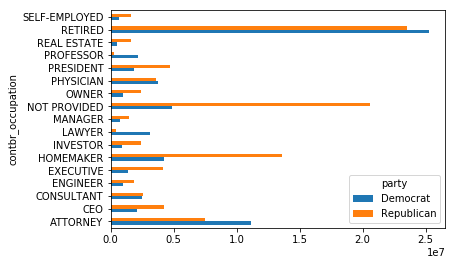

In [124]:
import matplotlib.pyplot as plt
over_2mm.plot(kind='barh')
plt.show()

In [137]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]

grouped = fec_mrbo.groupby('cand_nm')

In [138]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [139]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [144]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)


In [150]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [153]:
bucket_sums=grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [154]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


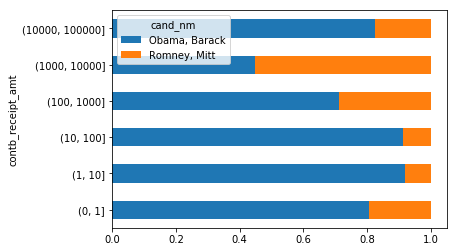

In [155]:
normed_sums[:-2].plot(kind='barh', stacked=True)
plt.show()

In [159]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [162]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
